Applying rules:
	adjacent: gender = False
	adjacent: language = False
	adjacent: game = False
Target fitness set to 100.0%


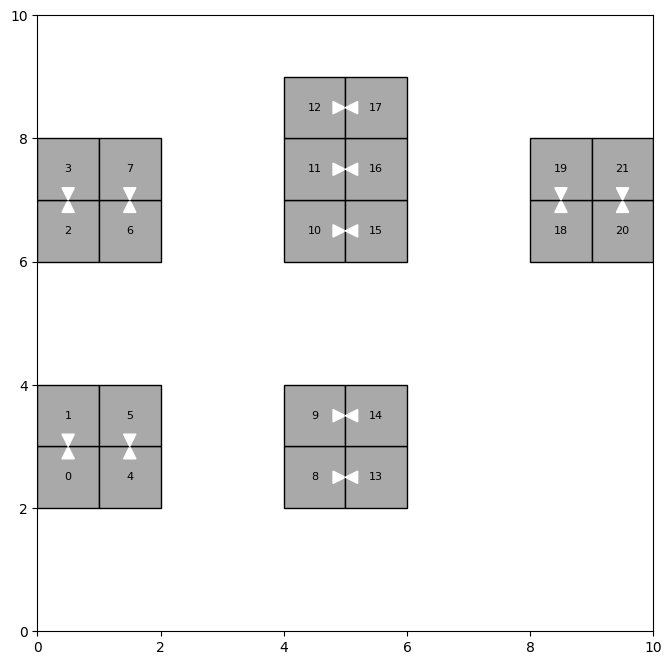

Random initial assignment


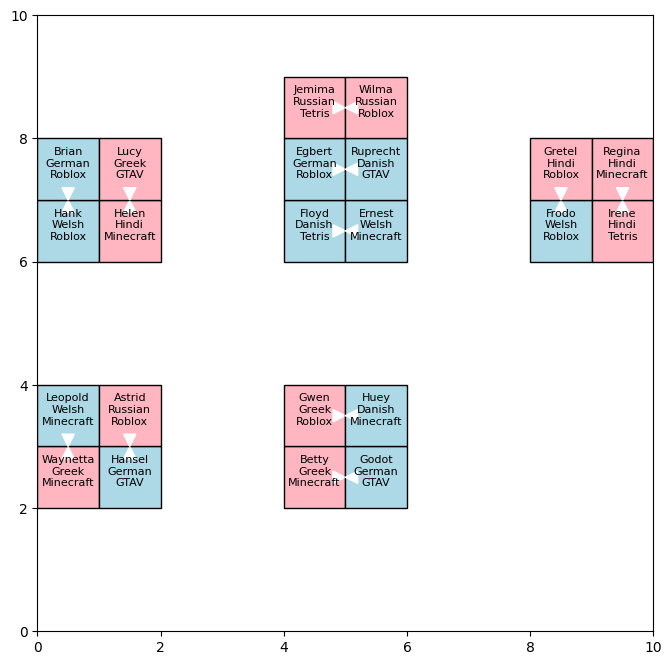


SUCCESS, 100.0% after 94936 iterations, in 4.86 seconds. Throughput: 19539.61


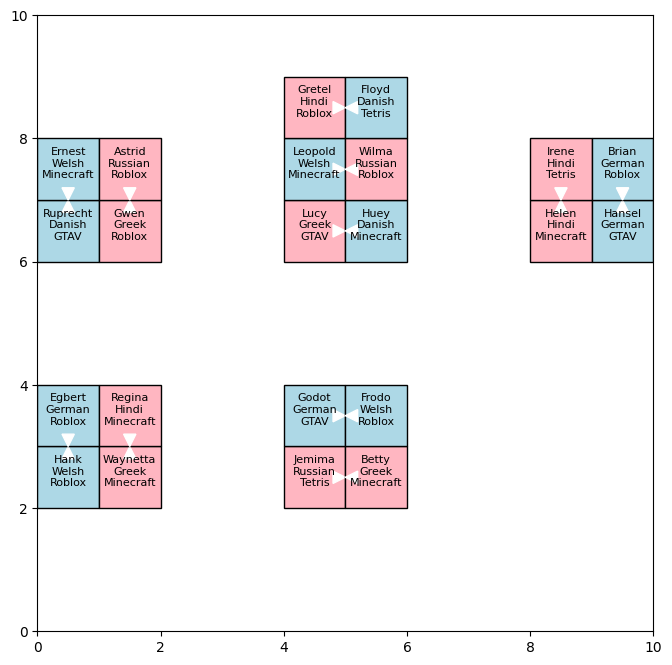

In [2]:
import pyseater as ps
args = ps.Parameters()
myseater = ps.Pyseater(args.n_rows, args.n_cols)

ps.add_table(myseater, 0, 2, ps.Table(2, 2, ps.Divide.HORIZONTAL))
ps.add_table(myseater, 4, 2, ps.Table(2, 2, ps.Divide.VERTICAL))
ps.add_table(myseater, 8, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))
ps.add_table(myseater, 4, 6, ps.Table(2, 3, ps.Divide.VERTICAL))
ps.add_table(myseater, 0, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))

myseater.adj_rules.append(ps.Rule("gender", False))
myseater.adj_rules.append(ps.Rule("language", False))
myseater.adj_rules.append(ps.Rule("game", False))

# ops_rules.append(Rule("gender", False))
# ops_rules.append(Rule("language", False))
# ops_rules.append(Rule("game", False))

if(args.log_level > 0) : print("Applying rules:")
for adj_rule in myseater.adj_rules :
    if(args.log_level > 0) : print("\tadjacent: " + str(adj_rule.attribute) + " = " + str(adj_rule.boolean))
for ops_rule in myseater.ops_rules :
    if(args.log_level > 0) : print("\topposite:" + str(ops_rule.attribute) + " = " + str(ops_rule.boolean))

if args.seed :
    if(args.log_level > 0) : print("Seed will be set to " + str(args.seed))
    rng.seed(args.seed)

if args.target_fitness :
    if(args.log_level > 0) : print("Target fitness set to " + str(args.target_fitness) + "%")
args.target_fitness = (args.target_fitness / 100) * (myseater.n_places * (len(myseater.adj_rules) + len(myseater.ops_rules)))

ps.draw_floorplan(myseater)
ps.do_random_assignment(myseater, args)
print("Random initial assignment")
ps.draw_floorplan(myseater)
myseater.solve(args)
ps.draw_floorplan(myseater)